# Options Pricer with Black Scholes model-Vanilla European Option Pricer & Binary Option Pricer

#### Assumptions 
  * It works on European options that can only be exercised at expiration.
  * No dividends are paid out during the option’s life.
  * There are no transaction and commissions costs in buying the option.
  * The risk-free rate and volatility of the underlying are known and constant.
  * The returns on the underlying are normally distributed.

#### Input variables:
  * Underlying price (per share): S_spot; 
  * Strike price of the option (per share): K_strike;
  * Time to maturity (years): T_term;
  * Continuously compounding risk-free interest rate: r_rate;
  * Volatility: sigma_vol;

#### Output Variables:
The cumulative density function of normal distribution N(.)
- N(d2) is the risk-adjusted probability that the option will be exercised.
- N(d1) is the probability of receiving the stock at expiration of the option.

The Greek letters
- Delta: The rate of change of the option price respected to the rate of the change of underlying asset price. 


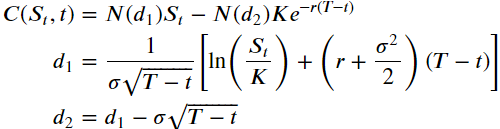

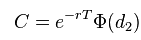

In [24]:
import pathlib
import math   as m                   # The standard Python math library
from math import log, sqrt, pi, exp
import numpy  as np                  # Numpy array library
import pandas as pd                  # Pandas data table and time series library
from pandas import DataFrame


input_dir = pathlib.Path('InputFolder_Assig')

from scipy.stats import norm        # Import the Normal distribution library

call_data = pd.read_csv(r'C:\Users\Elle Westwood\Documents\FINBA_files\Inputfolder_Assig\PricingData.csv', na_filter = True )

#use the if statement to determine the pricing model to use
def Pricing_Model (OptionType, Product):
    if (OptionType == 'Call') and (Product == 'Vanilla European'):
        return "Vanilla European Option Pricer"
    if (OptionType == 'Put') or (Product == 'Vanilla European'):
        return "Vanilla European Option Pricer"
    if (OptionType == 'Call') and (Product == 'Binary Option'):
        return "Binary Option Pricer"
    if (OptionType == 'Put') or (Product == 'Binary Option'):
        return "Binary Option Pricer"
    
#use Lambda and append pricing model to the dataframe    
call_data['Pricing_Model'] = call_data.apply(lambda row: Pricing_Model(row['OptionType'], row['Product']), axis = 1) 

#add two extra columns (price and Delta)
call_data["Price"] = ""
call_data["Delta"] = ""


#convert the columns to the right datatype
call_data['Price'] = call_data['Price'].apply(pd.to_numeric)
call_data['Delta'] = call_data['Delta'].apply(pd.to_numeric)
call_data['Spot'] = call_data['Spot'].astype(float)
call_data['Strike'] = call_data['Strike'].astype(float)


after = call_data.dtypes #save new datatype

#based on the diffrent pricing model, use loc to assign dataframe to a variable
A=call_data.loc[((call_data["Pricing_Model"]=="Vanilla European Option Pricer") & (call_data["OptionType"]=="Call"))] 
B=call_data.loc[((call_data["Pricing_Model"]=="Vanilla European Option Pricer") & (call_data["OptionType"]=="Put"))]
C=call_data.loc[((call_data["Pricing_Model"]=="Binary Option Pricer") & (call_data["OptionType"]=="Call"))] 

#selects all values that meet "A" condition for Vanilla European Option Pricer
S_spot= A["Spot"]
K_strike= A["Strike"]
T_term= A["Maturity"]
r_rate= A["Rate"]
sigma_vol=A["Volatility"]

#compute black scholes model and calculate d1
def black_scholes_call( S_spot, K_strike, T_term, r_rate ,sigma_vol ):
    d1 = ( 1.0 / (sigma_vol * np.sqrt(T_term)) 
           * (    np.log(float(S_spot)/float(K_strike))
               + (r_rate+sigma_vol**2/2.0) * T_term )) 
    d2 = d1 - sigma_vol * np.sqrt(T_term)
    call_price = norm.cdf(d1)*S_spot - norm.cdf(d2)*K_strike *np.exp(-r_rate*T_term)
    return call_price

def delta_BS_call ( S_spot, K_strike, T_term, r_rate ,sigma_vol ):   
    d1 = ( 1.0 / (sigma_vol * np.sqrt(T_term)) 
           * (    np.log(float(S_spot)/float(K_strike)) 
               + (r_rate+sigma_vol**2/2.0) * T_term ))   
    delta = norm.cdf(d1)
    return delta

#assign a variable to defined formula above
a=black_scholes_call( S_spot, K_strike, T_term, r_rate ,sigma_vol )
b=delta_BS_call ( S_spot, K_strike, T_term, r_rate ,sigma_vol )

#selects all values that meets "B" condition for Vanilla European Option Pricer
S_spot= B["Spot"]
K_strike= B["Strike"]
T_term= B["Maturity"]
r_rate= B["Rate"]
sigma_vol=B["Volatility"]

def black_scholes_put( S_spot, K_strike, T_term, r_rate ,sigma_vol ):
  
    d1 = ( 1.0 / (sigma_vol * np.sqrt(T_term)) 
           * (    np.log(float(S_spot)/float(K_strike))
               + (r_rate+sigma_vol**2/2.0) * T_term ))           
    d2 = d1 - sigma_vol * np.sqrt(T_term)
    Put_option = -S_spot*norm.cdf(-d1)+norm.cdf(-d2)*K_strike*np.exp(-r_rate*T_term)  #then we return the put option formular above.
    return Put_option

def delta_BS_put ( S_spot, K_strike, T_term, r_rate ,sigma_vol ):  
    d1 = ( 1.0 / (sigma_vol * np.sqrt(T_term)) 
           * (    np.log(float(S_spot)/float(K_strike))
               + (r_rate+sigma_vol**2/2.0) * T_term ))        
    deltaput = -norm.cdf(-d1)
    return deltaput

#assign a variable to defined formula above
c= black_scholes_put( S_spot, K_strike, T_term, r_rate ,sigma_vol )
d= delta_BS_put ( S_spot, K_strike, T_term, r_rate ,sigma_vol )


#selects all values that meets "C" condition for Binary Option Pricer
S_spot= C["Spot"]
K_strike= C["Strike"]
T_term= C["Maturity"]
r_rate= C["Rate"]
sigma_vol=C["Volatility"]


def black_scholes_Binary_call( S_spot, K_strike, T_term, r_rate ,sigma_vol ):    
    d1 = ( 1.0 / (sigma_vol * np.sqrt(T_term)) 
           * (    np.log(float(S_spot)/float(K_strike))
               + (r_rate+sigma_vol**2/2.0) * T_term ))   
    d2 = d1 - sigma_vol * np.sqrt(T_term)
    Binarycall = np.exp(-r_rate*T_term)*norm.cdf(d2)
    return Binarycall

def delta_BS_Binary_call( S_spot, K_strike, T_term, r_rate ,sigma_vol ):  # first we have to calculate d1 from formula above 
    d1 = ( 1.0 / (sigma_vol * np.sqrt(T_term)) 
           * (    np.log(float(S_spot)/float(K_strike))
               + (r_rate+sigma_vol**2/2.0) * T_term ))        
    d2 = d1 - sigma_vol * np.sqrt(T_term)
    delta=(np.exp(-r_rate*T_term)*norm.cdf(d2))/(sigma_vol*S_spot*(np.sqrt(T_term)))                                   
    return delta

#assign a variable to defined formula above
e= black_scholes_Binary_call( S_spot, K_strike, T_term, r_rate ,sigma_vol )
f= delta_BS_Binary_call( S_spot, K_strike, T_term, r_rate ,sigma_vol )

a={"dummy":[a,c,e]}                                                 #create a new dummy dataframe
b={"dummy2":[b,d,f]}
df=pd.DataFrame(a,columns=["dummy"]).astype(float)                  #define the datatype
df2=pd.DataFrame(b,columns=["dummy2"]).astype(float)

call_data["Price"]=df["dummy"]                                      #append new dummy dataframe to dataframe(call_data)
call_data["Delta"]=df2["dummy2"]

call_data.to_excel('Trade Prices and Deltas.xls')                   #store data in a file name trade prices & delta (xls)

call_data                                                           #calldata to return table

,Date,TradeID,Spot,Strike,Maturity,Rate,Volatility,Product,OptionType,Pricing_Model,Price,Delta
0,18/05/2019,TradeA,90.0,95.0,0.75,0.018,0.26,Vanilla European,Call,Vanilla European Option Pricer,6.504160,0.473059
1,18/05/2019,TradeB,101.0,106.0,1.00,0.022,0.33,Vanilla European,Put,Vanilla European Option Pricer,14.802134,-0.466033
2,18/05/2019,TradeC,102.0,105.0,0.25,0.013,0.19,Binary Option,Call,Binary Option Pricer,0.373866,0.038583
